# Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
test = pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

def get_train_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/train/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

def get_test_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/test/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)

display(train.head())
display(test.head())

,id,target,file_path
0,00000e74ad,1,../input/g2net-gravitational-wave-detection/tr...
1,00001f4945,0,../input/g2net-gravitational-wave-detection/tr...
2,0000661522,0,../input/g2net-gravitational-wave-detection/tr...
3,00007a006a,0,../input/g2net-gravitational-wave-detection/tr...
4,0000a38978,1,../input/g2net-gravitational-wave-detection/tr...


,id,target,file_path
0,00005bced6,0.5,../input/g2net-gravitational-wave-detection/te...
1,0000806717,0.5,../input/g2net-gravitational-wave-detection/te...
2,0000ef4fe1,0.5,../input/g2net-gravitational-wave-detection/te...
3,00020de251,0.5,../input/g2net-gravitational-wave-detection/te...
4,00024887b5,0.5,../input/g2net-gravitational-wave-detection/te...


# Visualize

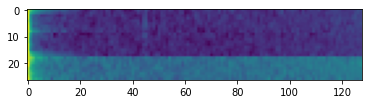

In [3]:
import librosa
import librosa.display

for i in range(1):
    waves = np.load(test.loc[i, 'file_path']).astype(np.float32) # (3, 4096)
    melspecs = []
    for j in range(3):
        melspec = librosa.feature.melspectrogram(waves[j] / max(waves[j]),
                                                 sr=4096, n_mels=128, fmin=20, fmax=2048)
        melspec = librosa.power_to_db(melspec)
        melspec = melspec.transpose((1, 0))
        melspecs.append(melspec)
    image = np.vstack(melspecs)
    plt.imshow(image)

# Save images

In [4]:
OUT_DIR = "test/"
os.mkdir(OUT_DIR)

In [5]:
def save_images(file_path):
    file_name = file_path.split('/')[-1].split('.npy')[0]
    waves = np.load(file_path).astype(np.float32) # (3, 4096)
    melspecs = []
    for j in range(3):
        melspec = librosa.feature.melspectrogram(waves[j] / max(waves[j]),
                                                 sr=4096, n_mels=128, fmin=20, fmax=2048)
        melspec = librosa.power_to_db(melspec)
        melspec = melspec.transpose((1, 0))
        melspecs.append(melspec)
    image = np.vstack(melspecs)
    np.save(OUT_DIR + file_name, image)

In [6]:
import joblib
from tqdm.auto import tqdm

_ = joblib.Parallel(n_jobs=8)(
    joblib.delayed(save_images)(file_path) for file_path in tqdm(test['file_path'].values)
)

  0%|          | 0/226000 [00:00<?, ?it/s]

In [ ]:
import shutil

shutil.make_archive(OUT_DIR, 'zip', OUT_DIR)
shutil.rmtree(OUT_DIR)